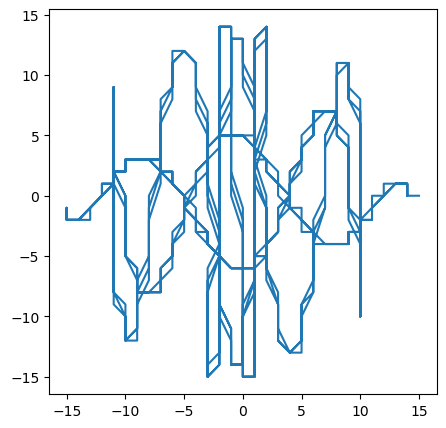

In [194]:
import matplotlib.pyplot as plt
import numpy as np


k = 5
t = np.linspace(0, 10, 1000)

x = np.floor(15*np.cos(4*t)*np.cos(t))  # Using np.sin for vectorized operations
y = np.floor(15*np.sin(4*k*t)*np.sin(t))   # Using np.cos and np.sqrt

fig = plt.figure(figsize=(5, 5))
# Create the plot
plt.plot(x, y)


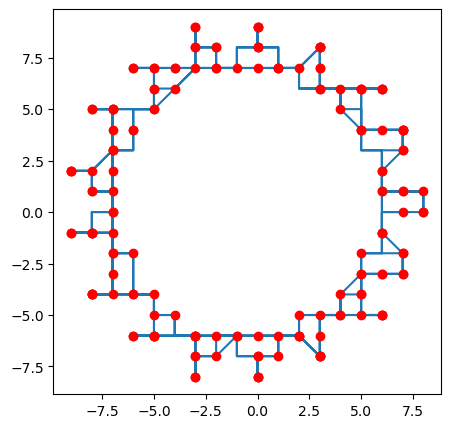

In [174]:
import matplotlib.pyplot as plt
import numpy as np

k = 7.5
t = np.linspace(0, 25, 1000)

x = np.floor(k * np.cos(t) + np.cos(k * t))  # Using np.sin for vectorized operations
y = np.ceil(k * np.sin(t) - np.sin(k * t)) # Using np.cos and np.sqrt

fig = plt.figure(figsize=(5, 5))
# Create the plot
plt.plot(x, y)


t_highlight = np.arange(0, 25, 0.15)  # t values to highlight from 0 to 10
x_highlight = np.floor(k * np.cos(t_highlight) + np.cos(k * t_highlight))
y_highlight = np.ceil(k * np.sin(t_highlight) - np.sin(k * t_highlight))
# Plot the highlighted points
plt.scatter(x_highlight, y_highlight, color='red', zorder=5, label="Highlighted points", marker='o')
# for i in range(len(t_highlight)):
#     plt.annotate(f"({x_highlight[i]:.2f}, {y_highlight[i]:.2f})", 
#                  (x_highlight[i], y_highlight[i]), 
#                  textcoords="offset points", 
#                  xytext=(5, 5), 
#                  ha='center', fontsize=8, color='blue')
# Show the plot
plt.show()

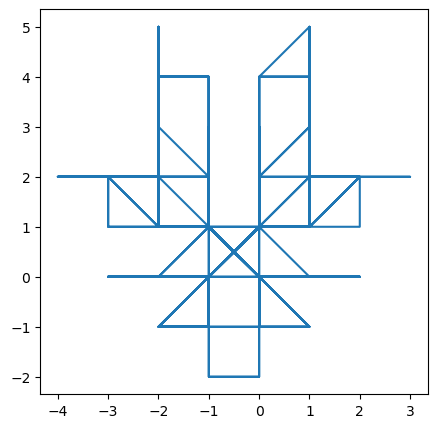

In [189]:
import matplotlib.pyplot as plt
import numpy as np

k = 9
t = np.linspace(0, 25, 1000)

x = np.floor(np.sin(t) * (np.exp(np.cos(t)) - 2 * np.cos(k * t) - np.sin(t / k)**5))  # Using np.sin for vectorized operations
y = np.ceil(np.cos(t) * (np.exp(np.cos(t)) - 2 * np.cos(k * t) - np.sin(t / k)**5)) # Using np.cos and np.sqrt

fig = plt.figure(figsize=(5, 5))
# Create the plot
plt.plot(x, y)

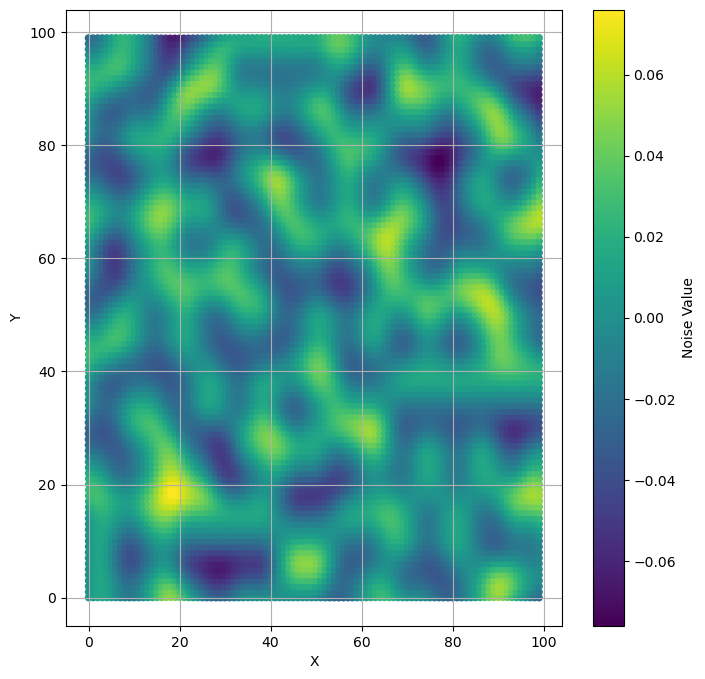

In [1]:
import numpy as np
import noise
import matplotlib.pyplot as plt

# Parameters
grid_size = 100  # 100x100 grid
randomness = 0.1  # Control how much noise is applied
scale = 12.0  # Larger scale to create a gradient effect

# Create the base 100x100 grid
x_values = np.arange(grid_size)
y_values = np.arange(grid_size)
X, Y = np.meshgrid(x_values, y_values)

# Apply Perlin noise to each grid point with better scaling
def apply_noise(x, y, scale, randomness):
    # Generate noise based on scaled grid coordinates
    noise_value = noise.pnoise2(x / scale, y / scale) * randomness
    return x + noise_value, y + noise_value, noise_value

# Initialize arrays to hold the noisy coordinates and noise values
noisy_X = np.zeros_like(X, dtype=float)
noisy_Y = np.zeros_like(Y, dtype=float)
noise_values = np.zeros_like(X, dtype=float)

# Apply noise to each point in the grid
for i in range(grid_size):
    for j in range(grid_size):
        noisy_X[i, j], noisy_Y[i, j], noise_values[i, j] = apply_noise(X[i, j], Y[i, j], scale, randomness)

# Plot the noisy grid with gradient visualized by color
plt.figure(figsize=(8, 8))

# Scatter plot where the color represents the noise value at each point
plt.scatter(noisy_X, noisy_Y, c=noise_values, cmap='viridis', s=20)

plt.colorbar(label="Noise Value")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Show the plot
plt.show()


In [126]:
a = noise(-1.0)
print(a)

0.0


[(0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 91), (7, 92), (7, 93), (7, 94), (7, 95), (7, 96), (7, 97), (7, 98), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 90), (8, 91), (8, 92), (8, 93), (8, 94), (8, 95), (8, 96), (8, 97), (8, 98), (8, 99), (9, 0), (9, 1), (9, 2), (9

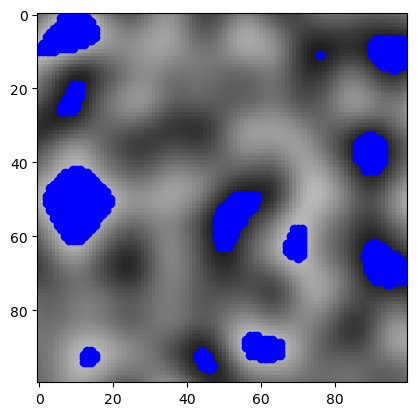

In [160]:
from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt

noise = PerlinNoise(octaves=5, seed=2)
xpix, ypix = 100, 100

pic = [[noise([i / xpix, j / ypix]) for j in range(xpix)] for i in range(ypix)]

threshold = -0.35
coordinates = [(i, j) for i in range(len(pic)) for j in range(len(pic[0])) if pic[i][j] < threshold or pic[i][j] > -threshold]
x_coords = [coord[1] for coord in coordinates]
y_coords = [coord[0] for coord in coordinates]
plt.scatter(x_coords, y_coords, c='blue', marker='o')

print(coordinates)

plt.imshow(pic, cmap='gray')

# Plot the scatter graph
plt.show()

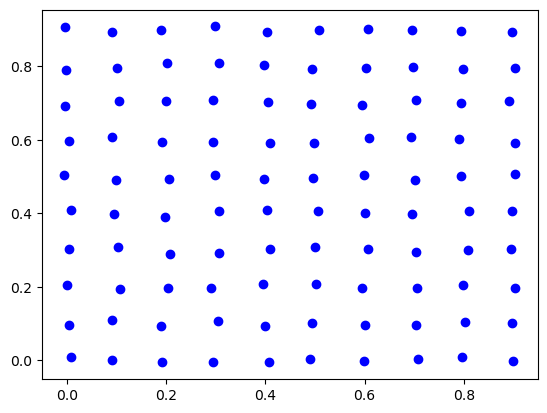

In [158]:
import numpy as np

def blend_grid_random(grid_size, jitter_strength=0.1):
    seed_points = []
    
    # Create grid points with jitter
    for i in range(grid_size):
        for j in range(grid_size):
            x = (i + np.random.uniform(-jitter_strength, jitter_strength)) * (1 / grid_size)
            y = (j + np.random.uniform(-jitter_strength, jitter_strength)) * (1 / grid_size)
            seed_points.append([x, y])
    
    # Add completely random points
    
    return np.array(seed_points)

# Example of blending grid and random points
seed_points = blend_grid_random(grid_size=10,  jitter_strength=0.1)
plt.scatter(seed_points[:, 0], seed_points[:, 1], c='blue', marker='o')


<function matplotlib.pyplot.show(close=None, block=None)>

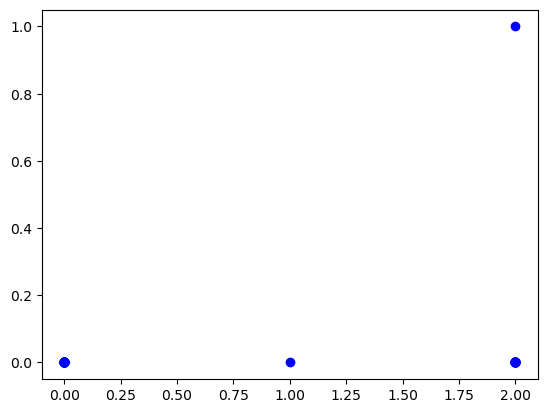

In [161]:
import numpy as np
import random

# Constants
GRID_SIZE = 100
TREE_DISTANCE = 20
SHRUB_DISTANCE = 2

def place_plants(r_factor):
    # Create an empty grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    
    # Place trees at structured intervals, adjusting for randomness
    for x in range(0, GRID_SIZE, TREE_DISTANCE):
        for y in range(0, GRID_SIZE, TREE_DISTANCE):
            rand_x = int(r_factor * random.uniform(-10, 10))  # Adjust tree position randomly
            rand_y = int(r_factor * random.uniform(-10, 10))
            place_tree(grid, x + rand_x, y + rand_y)
    
    # Place shrubs in the remaining space, ensuring the distance constraints
    for x in range(0, GRID_SIZE, SHRUB_DISTANCE):
        for y in range(0, GRID_SIZE, SHRUB_DISTANCE):
            if grid[x, y] == 0:  # Only place if the cell is empty
                rand_x = int(r_factor * random.uniform(-2, 2))
                rand_y = int(r_factor * random.uniform(-2, 2))
                place_shrub(grid, x + rand_x, y + rand_y)
    
    return grid

def place_tree(grid, x, y):
    if 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE:
        grid[x, y] = 1  # Represent trees as 1

def place_shrub(grid, x, y):
    if 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE:
        grid[x, y] = 2  # Represent shrubs as 2

# Generate the planting pattern with a randomness factor (e.g., 0.5 for moderate randomness)
grid = place_plants(r_factor=0.5)

plt.scatter(grid[:, 0], grid[:, 1], c='blue', marker='o')
plt.show

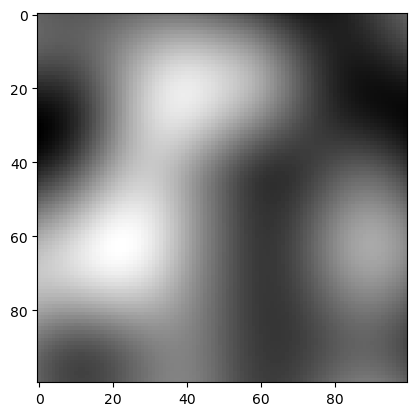

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=2, seed=10)
xpix, ypix = 100, 100

perlin_grid = np.array([[noise([i / xpix, j / ypix]) for j in range(xpix)] for i in range(ypix)])

plt.imshow(perlin_grid, cmap='gray')

# Plot the scatter graph
plt.show()

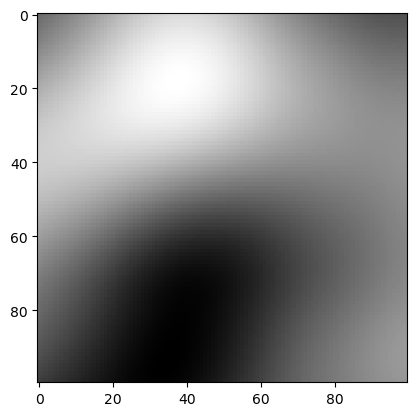

In [246]:
import numpy as np
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=1.25, seed=2)
xpix, ypix = 100, 100

perlin_grid = np.array([[noise([i / xpix, j / ypix]) for j in range(xpix)] for i in range(ypix)])

plt.imshow(perlin_grid, cmap='gray')

# Plot the scatter graph
plt.show()

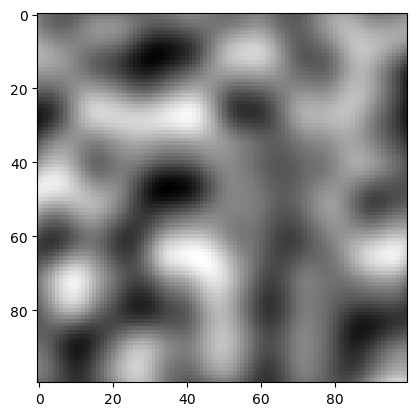

In [16]:
import numpy as np
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=5.35, seed=50)
xpix, ypix = 100, 100

perlin_grid = np.array([[noise([i / xpix, j / ypix]) for j in range(xpix)] for i in range(ypix)])

plt.imshow(perlin_grid, cmap='gray')

# Plot the scatter graph
plt.show()

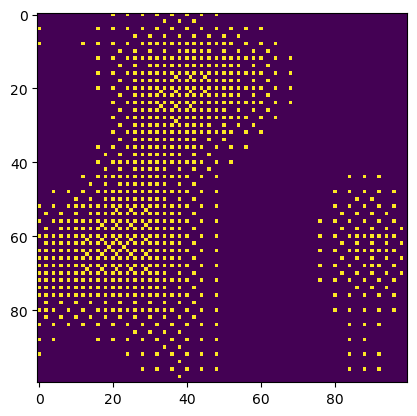

In [12]:
import numpy as np

# 4x4 Bayer matrix
bayer_matrix = np.array([
    [0, 8, 2, 10],
    [12, 4, 14, 6],
    [3, 11, 1, 9],
    [15, 7, 13, 5]
]) / 16.0  # Normalize the matrix between 0 and 1

# Dither using Bayer matrix
bayer_tile_size = bayer_matrix.shape[0]  # Size of the Bayer matrix (4x4)
dithered_grid = np.zeros_like(perlin_grid)

# Apply Bayer matrix dithering
for i in range(xpix):
    for j in range(xpix):
        # Tile the Bayer matrix over the entire grid
        bayer_value = bayer_matrix[i % bayer_tile_size, j % bayer_tile_size]
        # Threshold Perlin noise using Bayer matrix
        dithered_grid[i, j] = 1 if perlin_grid[i, j] > bayer_value else 0

# Get the positions where the thresholding has placed objects (e.g., trees)
tree_positions = np.argwhere(dithered_grid == 1)

plt.imshow(dithered_grid)

# Plot the scatter graph
plt.show()


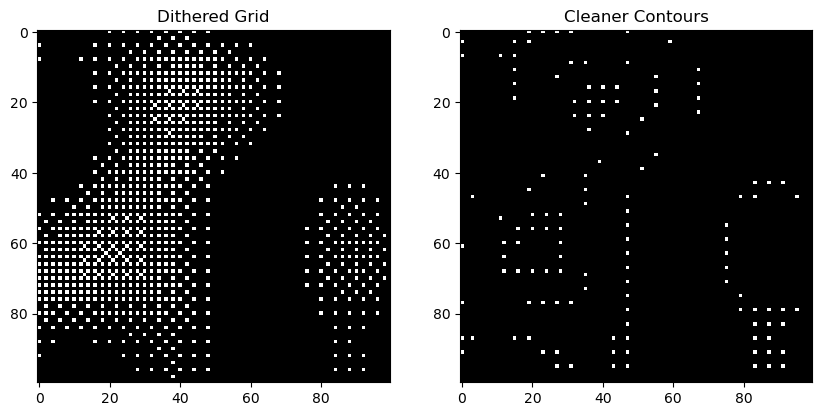

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming dithered_grid is already created from Bayer dithering

# Step 1: Smooth the grid using Gaussian blur to reduce noise and smooth edges
smoothed_grid = cv2.GaussianBlur(dithered_grid.astype(np.float32), (1, 1), 0)

# Step 2: Use Sobel operator to detect gradients
sobelx = cv2.Sobel(smoothed_grid, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobely = cv2.Sobel(smoothed_grid, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

# Magnitude of the gradient
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_magnitude = np.uint8(gradient_magnitude)

# Step 3: Threshold the gradient to get strong edges
_, edges = cv2.threshold(gradient_magnitude, 0, 255, cv2.THRESH_BINARY)

# Step 4: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Approximate contours to remove noise and unnecessary points
contour_image = np.zeros_like(dithered_grid)

for contour in contours:
    # Use contour approximation for a cleaner outline
    epsilon = 0.5 * cv2.arcLength(contour, True)
    approx_contour = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(contour_image, [approx_contour], -1, 1, thickness=1)

# Step 6: Display the original dithered grid and the cleaned contour
plt.figure(figsize=(10, 5))

# Show original dithered grid
plt.subplot(1, 2, 1)
plt.imshow(dithered_grid, cmap='gray')
plt.title('Dithered Grid')

# Show the detected contour outline
plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Cleaner Contours')

plt.show()


In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Apply a binary threshold to the image (since the image is black and white)
dithered_grid_8bit = (dithered_grid * 255).astype(np.uint8)

_, binary_image = cv2.threshold(dithered_grid_8bit, 128, 255, cv2.THRESH_BINARY)

# Use morphological operations to fill in the shapes
# First, dilate the shapes to connect dots within each shape
kernel = np.ones((10,10), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=2)

# Then use flood fill to fill in the shapes
flood_filled_image = dilated_image.copy()
h, w = flood_filled_image.shape
mask = np.zeros((h+2, w+2), np.int8)  # Create a mask for flood filling
cv2.floodFill(flood_filled_image, mask, (0,0), 255)

# Invert flood filled image
flood_filled_image_inv = cv2.bitwise_not(flood_filled_image)

# Combine with original dilated image
final_mask = cv2.bitwise_or(binary_image, flood_filled_image_inv)

# Plot the result
plt.figure(figsize=(6,6))
plt.imshow(final_mask, cmap='gray')
plt.title('Filled Shapes Mask')
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\floodfill.cpp:504: error: (-2:Unspecified error) in function 'int __cdecl cv::floodFill(const class cv::_InputOutputArray &,const class cv::_InputOutputArray &,class cv::Point_<int>,class cv::Scalar_<double>,class cv::Rect_<int> *,class cv::Scalar_<double>,class cv::Scalar_<double>,int)'
>  (expected: 'mask.type() == CV_8U'), where
>     'mask.type()' is 1 (CV_8SC1)
> must be equal to
>     'CV_8U' is 0 (CV_8UC1)


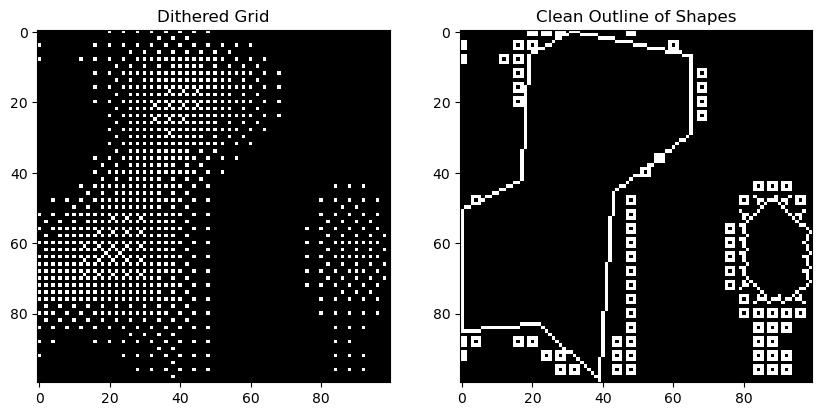

In [25]:
dithered_grid_8bit = (dithered_grid * 255).astype(np.uint8)

# Step 1: Apply a dilation to smooth and close small gaps (to eliminate inner noise)
kernel = np.ones((3, 3), np.uint8)
dilated_grid = cv2.dilate(dithered_grid_8bit, kernel, iterations=1)

# Step 2: Find external contours only
contours, _ = cv2.findContours(dilated_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Create an empty image to draw the boundary
contour_image = np.zeros_like(dithered_grid)

# Step 4: Simplify contours using approximation to remove excessive detail
for contour in contours:
    # Use contour approximation for smoother outlines
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx_contour = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(contour_image, [approx_contour], -1, 1, thickness=1)

# Step 5: Display the original dithered grid and the cleaned contour
plt.figure(figsize=(10, 5))

# Show the dithered grid (input image)
plt.subplot(1, 2, 1)
plt.imshow(dithered_grid, cmap='gray')
plt.title('Dithered Grid')

# Show the clean contour outline (output image)
plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Clean Outline of Shapes')

plt.show()

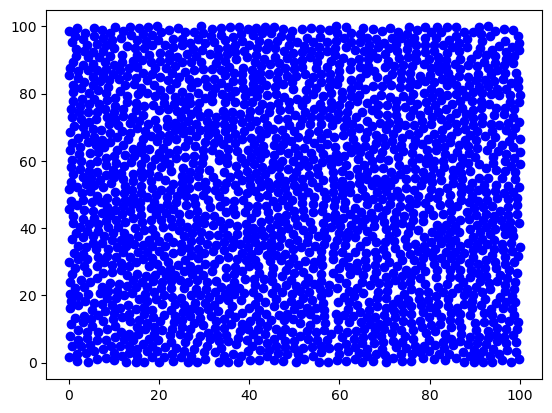

In [10]:
import poisson_disc as pd

points = pd.Bridson_sampling()
points_surf = pd.Bridson_sampling(dims=np.array([100,100]), radius=2, k=50, hypersphere_sample=pd.hypersphere_surface_sample)

plt.scatter(points_surf[:,0], points_surf[:,1],c='blue', marker='o')

In [11]:
overlapped_grid = np.zeros_like(perlin_grid)

for index, coord in enumerate(points_surf):
    x = int(coord[0])
    y = int(coord[1])
    if dithered_grid[x,y] == 1:
        overlapped_grid[x,y] = 1

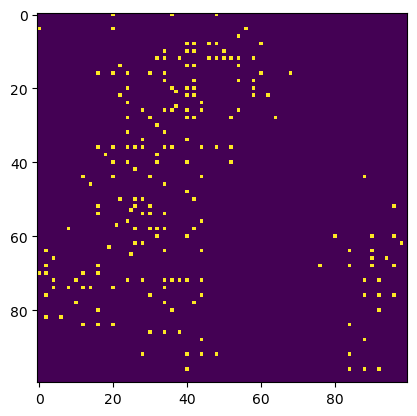

In [12]:
plt.imshow(overlapped_grid)

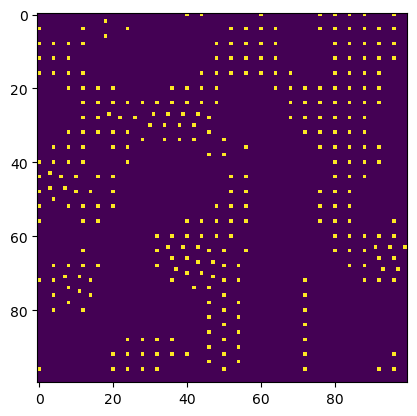

In [19]:
from scipy.spatial.distance import cdist

# Set minimum distance threshold
min_distance = 3

# Copy of tree positions to modify
filtered_positions = tree_positions.copy()

# Compute pairwise distances between positions
distances = cdist(filtered_positions, filtered_positions)

# Start by keeping all positions
keep = np.ones(len(filtered_positions), dtype=bool)

# Check for points that are too close
for i in range(len(filtered_positions)):
    if keep[i]:  # Only consider points that haven't been removed
        for j in range(i + 1, len(filtered_positions)):
            if distances[i, j] < min_distance:
                # Remove the second point if it's too close
                keep[j] = False

# Filter the tree positions to retain only those that meet the distance constraint
filtered_positions = filtered_positions[keep]

# Update the dithered grid by clearing it first
filtered_dithered_grid = np.zeros_like(dithered_grid)

# Set positions that passed the filter
for pos in filtered_positions:
    filtered_dithered_grid[pos[0], pos[1]] = 1

# Plot the filtered dithered grid
plt.imshow(filtered_dithered_grid)
plt.show()
